#### Importing the Libraries

In [33]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

#### Processing the Data

In [34]:
english = pd.read_csv("CONcreTEXT_trial_EN.tsv", sep='\t')
tokenizer = RegexpTokenizer(r"\w+")
englishText=[]
for str in english["TEXT"]:
    temp=tokenizer.tokenize(str.lower())
    englishText.append(temp)
englishText

[['bring',
  'up',
  'academic',
  'achievements',
  'awards',
  'and',
  'other',
  'milestones',
  'in',
  'your',
  'life'],
 ['please',
  'list',
  'people',
  'you',
  'have',
  'helped',
  'your',
  'personal',
  'achievements',
  'or',
  'troublesome',
  'times',
  'you',
  'have',
  'overcome'],
 ['add', 'activated', 'carbon', 'straight', 'to', 'your', 'vodka'],
 ['place',
  'sensors',
  'around',
  'your',
  'garden',
  'and',
  'when',
  'a',
  'cat',
  'comes',
  'in',
  'the',
  'motion',
  'activates',
  'a',
  'sensor'],
 ['look',
  'for',
  'a',
  'partner',
  'that',
  'shares',
  'your',
  'level',
  'of',
  'adventure',
  'in',
  'pursuing',
  'new',
  'types',
  'of',
  'experiences'],
 ['most',
  'animated',
  'action',
  'adventure',
  'thriller',
  'or',
  'mystery',
  'films',
  'and',
  'books',
  'could',
  'work',
  'here'],
 ['if',
  'people',
  'think',
  'you',
  're',
  'phony',
  'or',
  'putting',
  'on',
  'airs',
  'they',
  'll',
  'tell',
  'from',
 

#### Question 1 : Adapt the given code to work on the English data file instead. You should use the ‘TEXT’ column from the English data file to populate the list of ‘sentences’ in the given code example (i.e. the structure sentences = []  should contain the data from all sentences in the ‘TEXT’ column of English data file. 

In [35]:
model = Word2Vec(englishText, window=5, size=500, workers=4, min_count=2)

In [36]:
model.wv.vocab

{'a': <gensim.models.keyedvectors.Vocab at 0x7f816ce4c630>,
 'about': <gensim.models.keyedvectors.Vocab at 0x7f816ce4f160>,
 'achievements': <gensim.models.keyedvectors.Vocab at 0x7f816ce4c2b0>,
 'adventure': <gensim.models.keyedvectors.Vocab at 0x7f816ce4c7b8>,
 'airs': <gensim.models.keyedvectors.Vocab at 0x7f816ce4c978>,
 'also': <gensim.models.keyedvectors.Vocab at 0x7f817120ffd0>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7f816ce4cd30>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f816ce4c2e8>,
 'any': <gensim.models.keyedvectors.Vocab at 0x7f816ce4cda0>,
 'are': <gensim.models.keyedvectors.Vocab at 0x7f816ce4cb38>,
 'around': <gensim.models.keyedvectors.Vocab at 0x7f816ce4c5c0>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7f816ce4cfd0>,
 'at': <gensim.models.keyedvectors.Vocab at 0x7f816cf2e630>,
 'away': <gensim.models.keyedvectors.Vocab at 0x7f816ce4ca58>,
 'bake': <gensim.models.keyedvectors.Vocab at 0x7f816ce4cac8>,
 'ball': <gensim.models.keyedvectors.Vocab at 0x7f8

In [37]:
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [38]:
tsne_model = TSNE(perplexity=250, n_components=2, init='pca', n_iter=250)

In [39]:
new_values = tsne_model.fit_transform(tokens)

In [40]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

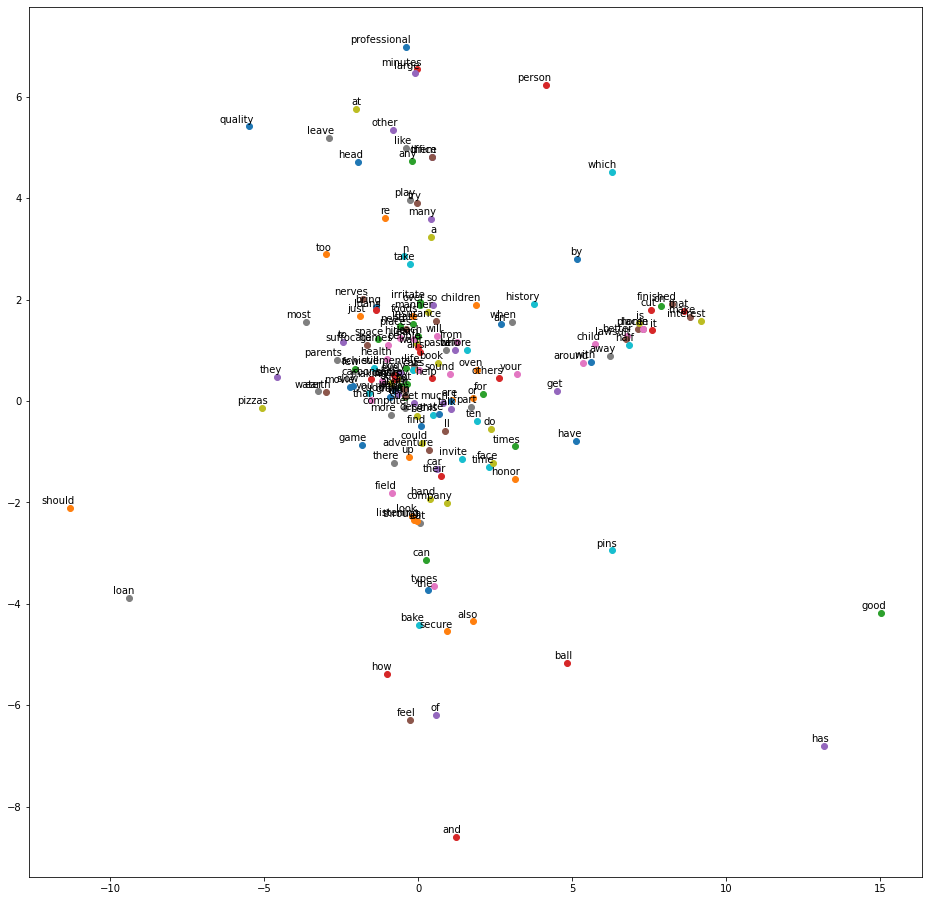

In [41]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
  plt.scatter(x[i],y[i])
  plt.annotate(labels[i],
  xy=(x[i], y[i]),
  xytext=(5, 2),
  textcoords='offset points',
  ha='right',
  va='bottom')

#### Question 2 : Model Diagnosis. Are you satisfied with the quality of the embeddings? Why or why not? 

In [43]:
model.wv.most_similar(positive=['game'], negative=['work'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('also', 0.09542195498943329),
 ('growth', 0.09380510449409485),
 ('oven', 0.09149868786334991),
 ('of', 0.08444255590438843),
 ('just', 0.08257491886615753),
 ('take', 0.07854047417640686),
 ('time', 0.0750751942396164),
 ('eat', 0.07185610383749008),
 ('company', 0.07105101644992828),
 ('t', 0.0700884759426117)]

In [45]:
model.wv.most_similar('interest')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('about', 0.13979077339172363),
 ('making', 0.13207772374153137),
 ('finished', 0.1047334223985672),
 ('decorate', 0.10381735116243362),
 ('manner', 0.09518785029649734),
 ('growth', 0.0926927775144577),
 ('s', 0.08919085562229156),
 ('a', 0.0881345197558403),
 ('so', 0.07817041873931885),
 ('water', 0.07782211899757385)]

In [46]:
model.wv.most_similar('part')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('be', 0.12678520381450653),
 ('home', 0.10938568413257599),
 ('face', 0.10787943750619888),
 ('want', 0.1061093732714653),
 ('up', 0.10086188465356827),
 ('finished', 0.10040770471096039),
 ('if', 0.08825089782476425),
 ('make', 0.08534304797649384),
 ('get', 0.08513446897268295),
 ('on', 0.0795535296201706)]

In [ ]:
model.wv.most_similar('child')

In [47]:
model.wv.doesnt_match('interest food child part'.split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'child'

Here, I have used methods such as most_similar() and doesnt_match() and see how the model is behaving. First I have checked most similar words by giving the positive and negative parameters. Here I have taken positive parameter as 'game' and negative one as 'work'. For the positive parameter we got similar words as growth and time where as for negative parameter we got similar words such as oven, eat and company. However it failed to check for few words such as t, of and just. We have also check the words that doesn't match for words such as interest, food, child and part and it matched the word interest as the output because it does not match the other words.

So, to conclude that some cases are passed where as there are few cases that are failing. But overall, we are able to find the similar words and the ones that doesn;t match. So the quuanity of embeddings are satisfactory

#### Question 3 : Model Refinement. Subsampling Frequent Words and Negative Sampling

##### **Subsampling**
Let us consider a sentence "The quick fox jumps over the lazy dog". When we take a word pair such as "fox" and "the", it does not tell much about the context of the sentence. So here SubSampling comes into picture. For each and every word in the training set, there is a chance that we delete that from the set. The probability of removing the word is dependent on the its frequency

##### **Negative sampling**
By training a neural network, we adjust the neural weights for each and every input text. We have to modify all the weights each step by step, which is billions of weights for each training sample.
Here comes the concept of Negative sampling. Negative sampling addresses this by having each training sample only modify a small percentage of weights. 
The negative samples are selected using a unigram distribution where the more frequent words are likely to be selected as negative samples.